In [1]:
import ConfinedBrownianAnalysis as cb
import pickle

In [2]:
#from Data_analysis import Data_analysis
#from Dedrift import Dedrift
#from Data import Data
import matplotlib.pyplot as plt

import seaborn
import seaborn as sns


%matplotlib widget

custom_params = {
    "xtick.direction": "in",
    "ytick.direction": "in",
    "lines.markeredgecolor": "k",
    "lines.markeredgewidth": 1,
    "figure.dpi": 100,
    "text.usetex": False,
    "font.family": "serif"
}
sns.set_theme(context = "notebook", style="ticks", rc=custom_params)

In [13]:
load_observables = False
save_observable = True
filename = "Observables.pickle"

In [4]:
if load_observables:
    with open('example_observables.pickle', 'rb') as handle:
        analysis = pickle.load(handle)

In [6]:
data = cb.Data(file = "example_trajectory.mat", fps = 100, cutoff= 120000)

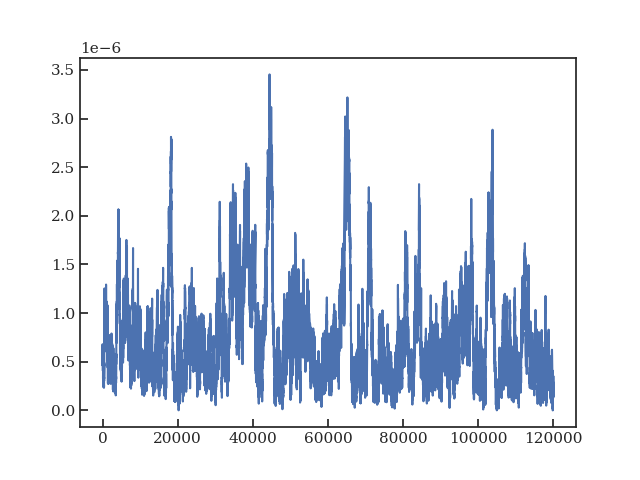

In [7]:
plt.figure()
plt.plot(data.z)
plt.show()

In [8]:
args = {
    "MSD_bins":  100,  # Number of PDF bins
    "t_LMSD": (20.0, 25),  # Time used to compute the plateau
    "t_sPDF":(0.01, 0.05),  # Short time PDF dispalcement
    "range_pdf": (1e-8, 2.5e-6),  # Range of the height PDF
    "num_pdf":  70,  # number of bins in the height PDF
    "range_F_eq": (2e-8, 2e-6),
    "num_F_eq":  20,
    "SPDF_bins": 40,  # Short time PDF bins
    "t_Lpdf":  (18.0, 20.0),  # time for the long time PDF
    "range_D": (1e-9, 2e-6),  # range of computation of Ronceray
    "N_local_D": 200,  # mber of points for the diffusion computation
    "ordre_D": 2,  # Ronceray polynomial order
    "LPDF_bins": 50,  # number of bins in the long time PDF
}

In [9]:
data.dedrift(window = 5000)
if ~load_observables:
    analysis = cb.Observables(data, **args)


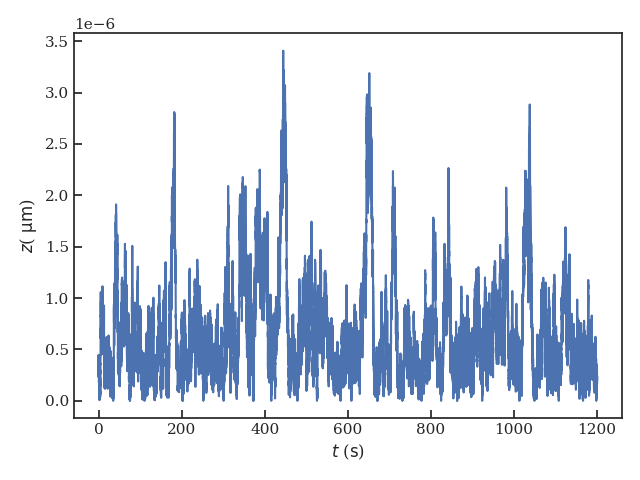

In [10]:
data.plot_1D("z")

In [11]:
if ~load_observables:
    analysis.computing_all()

Computing MSD
Computing MSD on x


100%|████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 1282.79it/s]


Computing MSD on y


100%|████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 1265.03it/s]


Computing MSD on z


100%|████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 1421.17it/s]


Computing long time MSD
Computing PDF
Computing the conservative forces
Computing 4th cumulant
Computing C4 on x


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 147.63it/s]


Computing C4 on y


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 171.07it/s]


Computing C4 on z


100%|█████████████████████████████████████████████████████████████████████████████████| 84/84 [00:00<00:00, 155.00it/s]


Computing PDF at small times
Computing PDF at large time
Computing the local diffusion


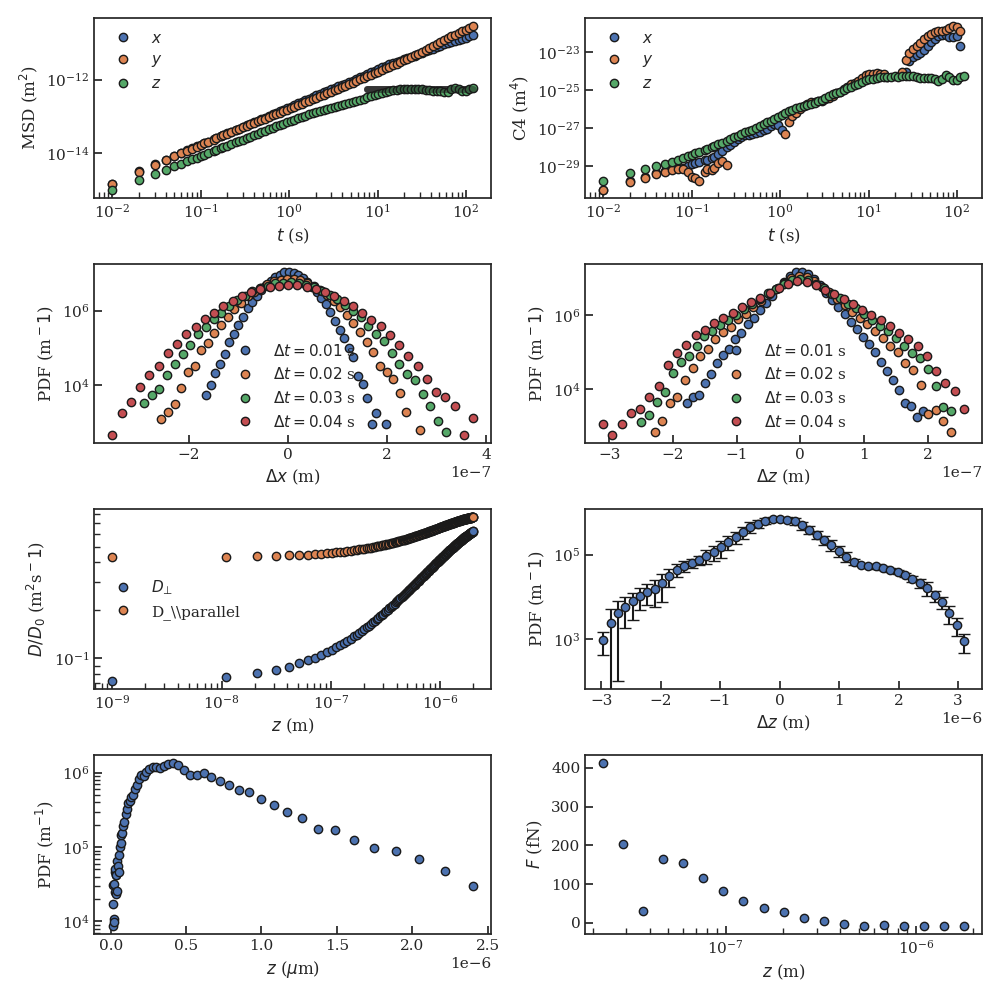

In [12]:
analysis.general_plot()

In [ ]:
if save_observable:
    with open(filename, 'wb') as handle:
        pickle.dump(analysis, handle, protocol=pickle.HIGHEST_PROTOCOL)    

## Minizer

In [12]:
Model = cb.Model()

In [17]:
args_minimizer = { 
    "Model":Model,
    "analysis":analysis,
    "range_MSD_short":(1e-2, 1),
    "range_plateau_MSD":(1e-2, 1e-1),
    "range_C4_short":(1e-2, 1e-1),
    "range_diffusion":None,
    "range_Peq":None,
    "range_Feq":None,
}

In [19]:
Minimizer = cb.Minimizer(**args_minimizer)

In [20]:
minizers = Minimizer.available_minimizer

In [25]:
import numpy as np

In [27]:
for i in minizers:
    
    class_method = getattr(cb.Minimizer, i)

    result = class_method(Minimizer)

NameError: name 'np' is not defined